In [ ]:
import dolfinx as dlx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ls_prior import builder
from mpi4py import MPI

sns.set_theme(style="ticks")

In [42]:
mesh = dlx.mesh.create_rectangle(
    MPI.COMM_WORLD,
    [np.array([0, 0]), np.array([1, 1])],
    [20, 20],
    dlx.mesh.CellType.triangle,
)

prior_settings = builder.BilaplacianPriorSettings(
    mesh=mesh,
    mean_vector=np.zeros(mesh.geometry.x.shape[0]),
    kappa=10,
    tau=0.05,
)

In [43]:
prior_builder = builder.BilaplacianPriorBuilder(prior_settings)
bilaplace_prior = prior_builder.build()

In [44]:
num_samples = 10000
samples = []
for _ in range(num_samples):
    sample = bilaplace_prior.generate_sample()
    samples.append(sample)

mean = np.mean(samples, axis=0)
variance = np.var(samples, axis=0)

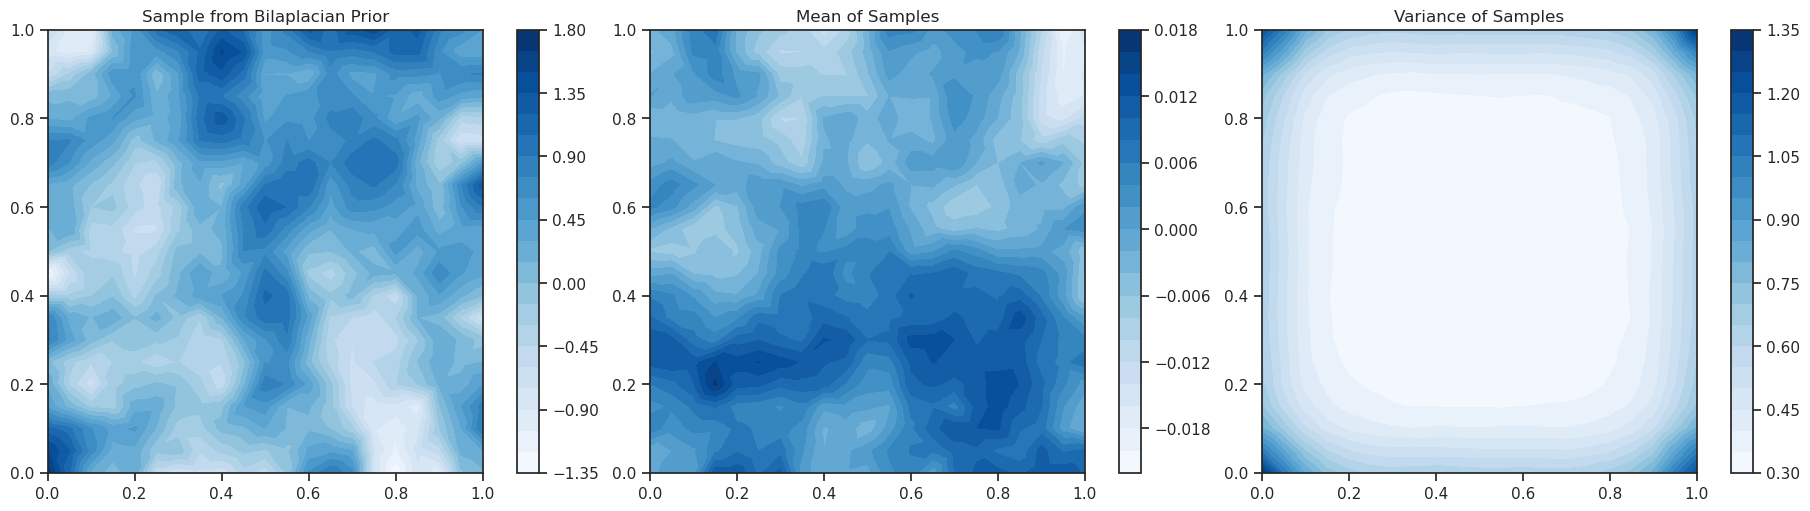

In [45]:
sample = bilaplace_prior.generate_sample()

vertices = mesh.geometry.x
simplices = mesh.geometry.dofmap

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), layout="constrained")
contour_plot = axs[0].tricontourf(vertices[:, 0], vertices[:, 1], sample, levels=20, cmap="Blues")
plt.colorbar(contour_plot, ax=axs[0])
contour_plot = axs[1].tricontourf(vertices[:, 0], vertices[:, 1], mean, levels=20, cmap="Blues")
plt.colorbar(contour_plot, ax=axs[1])
contour_plot = axs[2].tricontourf(vertices[:, 0], vertices[:, 1], variance, levels=20, cmap="Blues")
plt.colorbar(contour_plot, ax=axs[2])
axs[0].set_title("Sample from Bilaplacian Prior")
axs[1].set_title("Mean of Samples")
axs[2].set_title("Variance of Samples")
plt.show()